In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
correlation_file_name <- "all_germline_filtered_bams_tumor_ci5_cs1e9_correlation"
#"ci5_cs1e9_correlation" 
#all_germline_ci5_cs1e9_correlation 
#all_germline_filtered_bams_tumor_ci5_cs1e9_correlation

In [3]:
paramspace <- read.csv("data/metadata/paramspace_cfDNA_phaseI.csv")

In [4]:
patients <- as.character(unique(paramspace$pt_id))

In [5]:
patients

[1] "C04689" "C04816" "C04837" "C04849" "C04873" "C04874" "C04886" "C04887"
 [9] "C05048" "C05073" "C05084" "C05118" "C05194" "C05234" "C05703"

In [6]:
correlation_per_patient <- data.frame(matrix(ncol = 3, nrow = 0))

colnames(correlation_per_patient) <-c("pt_id", "cfDNA_sample", "correlation")

In [7]:
for (i in patients){
    correlation_csv <- read.csv(paste("data/", i, "/", correlation_file_name, ".csv", sep = ""))
    for (j in correlation_csv$cfDNA_sample){
        correlation_row <- correlation_csv %>% filter(cfDNA_sample == j)
        correlation <- correlation_row$Correlation
        correlation_per_patient[nrow(correlation_per_patient)+1,] = c(i, j, correlation)
                                    
}}

In [8]:
correlation_per_patient <- correlation_per_patient %>% mutate(sampleID = str_sub(cfDNA_sample,1, 11))

In [9]:
correlation_per_patient

pt_id,cfDNA_sample,correlation,sampleID
C04689,C303A04689D_cfdna_N295-103,0.103748558942413,C303A04689D
C04689,C305A04689D_cfdna_N295-71,0.127365667084304,C305A04689D
C04689,C309A04689D_cfdna_N295-47,0.106459304207479,C309A04689D
C04689,C302A04689D_cfdna_N295-102,0.143246295746925,C302A04689D
C04689,C299A04689D_cfdna_N295-99,-0.0105431123825536,C299A04689D
C04689,C307A04689D_cfdna_N295-110,0.128624341688174,C307A04689D
C04689,C300A04689D_cfdna_N295-100,0.181386821081504,C300A04689D
C04689,C306A04689D_cfdna_N295-90,0.1256822916402,C306A04689D
C04689,C312A04689D_cfdna_N295-162,0.15830961210384,C312A04689D
C04689,C311A04689D_cfdna_N295-157,0.0768720514117552,C311A04689D


In [10]:
sample_timepoint <- read.csv("data/metadata/clin_data/sample_timepoint_formatted.csv")
sample_timepoint_days <- sample_timepoint %>% filter(phase == "phaseI")
sample_timepoint_days <- sample_timepoint_days %>% select(sampleID, sample_timepoint_days_since_OP)

In [11]:
correlation_per_patient <- left_join(correlation_per_patient, sample_timepoint_days, by="sampleID")

In [12]:
correlation_per_patient

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP
C04689,C303A04689D_cfdna_N295-103,0.103748558942413,C303A04689D,267
C04689,C305A04689D_cfdna_N295-71,0.127365667084304,C305A04689D,454
C04689,C309A04689D_cfdna_N295-47,0.106459304207479,C309A04689D,820
C04689,C302A04689D_cfdna_N295-102,0.143246295746925,C302A04689D,175
C04689,C299A04689D_cfdna_N295-99,-0.0105431123825536,C299A04689D,-1
C04689,C307A04689D_cfdna_N295-110,0.128624341688174,C307A04689D,637
C04689,C300A04689D_cfdna_N295-100,0.181386821081504,C300A04689D,37
C04689,C306A04689D_cfdna_N295-90,0.1256822916402,C306A04689D,539
C04689,C312A04689D_cfdna_N295-162,0.15830961210384,C312A04689D,1085
C04689,C311A04689D_cfdna_N295-157,0.0768720514117552,C311A04689D,994


In [13]:
relapse_pt = c("C04849", "C04874", "C05084", "C05118", "C05234")

In [14]:
Correlation <- correlation_per_patient %>% mutate(Relapse = ifelse(pt_id %in% relapse_pt, "Relapse", "No_relapse"))

In [15]:
Correlation

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP,Relapse
C04689,C303A04689D_cfdna_N295-103,0.103748558942413,C303A04689D,267,No_relapse
C04689,C305A04689D_cfdna_N295-71,0.127365667084304,C305A04689D,454,No_relapse
C04689,C309A04689D_cfdna_N295-47,0.106459304207479,C309A04689D,820,No_relapse
C04689,C302A04689D_cfdna_N295-102,0.143246295746925,C302A04689D,175,No_relapse
C04689,C299A04689D_cfdna_N295-99,-0.0105431123825536,C299A04689D,-1,No_relapse
C04689,C307A04689D_cfdna_N295-110,0.128624341688174,C307A04689D,637,No_relapse
C04689,C300A04689D_cfdna_N295-100,0.181386821081504,C300A04689D,37,No_relapse
C04689,C306A04689D_cfdna_N295-90,0.1256822916402,C306A04689D,539,No_relapse
C04689,C312A04689D_cfdna_N295-162,0.15830961210384,C312A04689D,1085,No_relapse
C04689,C311A04689D_cfdna_N295-157,0.0768720514117552,C311A04689D,994,No_relapse


In [16]:
Correlation$correlation <- as.numeric(Correlation$correlation)

In [17]:
write.csv(Correlation, paste("data/", correlation_file_name, ".csv", sep = ""))

In [18]:
head(Correlation)

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP,Relapse
C04689,C303A04689D_cfdna_N295-103,0.10374856,C303A04689D,267,No_relapse
C04689,C305A04689D_cfdna_N295-71,0.12736567,C305A04689D,454,No_relapse
C04689,C309A04689D_cfdna_N295-47,0.10645930,C309A04689D,820,No_relapse
C04689,C302A04689D_cfdna_N295-102,0.14324630,C302A04689D,175,No_relapse
C04689,C299A04689D_cfdna_N295-99,-0.01054311,C299A04689D,-1,No_relapse
C04689,C307A04689D_cfdna_N295-110,0.12862434,C307A04689D,637,No_relapse


In [19]:
clinical_data <- read.csv("data/metadata/clin_data/clinical_data_formatted.csv")
clinical_data_relapse <- clinical_data %>% select(patient_id, time_to_relapse_days, adjuvant_chemo_start_days, adjuvant_chemo_end_days)
colnames(clinical_data_relapse) <- c("pt_id", "time_to_relapse_days", "adjuvant_chemo_start_days", "adjuvant_chemo_end_days")
head(clinical_data_relapse)

pt_id,time_to_relapse_days,adjuvant_chemo_start_days,adjuvant_chemo_end_days
C05101,NA,12.17500,133.9250
C05796,NA,12.17500,170.4500
C06018,258.7188,15.21875,203.9313
C04689,NA,15.21875,197.8438
C05173,NA,15.21875,100.4437
C05188,NA,15.21875,179.5813


In [20]:
res <-left_join(Correlation, clinical_data_relapse, by="pt_id")

In [21]:
head(res)

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP,Relapse,time_to_relapse_days,adjuvant_chemo_start_days,adjuvant_chemo_end_days
C04689,C303A04689D_cfdna_N295-103,0.10374856,C303A04689D,267,No_relapse,NA,15.21875,197.8438
C04689,C305A04689D_cfdna_N295-71,0.12736567,C305A04689D,454,No_relapse,NA,15.21875,197.8438
C04689,C309A04689D_cfdna_N295-47,0.10645930,C309A04689D,820,No_relapse,NA,15.21875,197.8438
C04689,C302A04689D_cfdna_N295-102,0.14324630,C302A04689D,175,No_relapse,NA,15.21875,197.8438
C04689,C299A04689D_cfdna_N295-99,-0.01054311,C299A04689D,-1,No_relapse,NA,15.21875,197.8438
C04689,C307A04689D_cfdna_N295-110,0.12862434,C307A04689D,637,No_relapse,NA,15.21875,197.8438


In [22]:
normalized_res_intervention_relapses <- res %>% filter(Relapse == "Relapse", sample_timepoint_days_since_OP >= time_to_relapse_days)
normalized_res_intervention_pre_or_no_relapse1 <- res %>% group_by(pt_id) %>% filter(Relapse == "Relapse", sample_timepoint_days_since_OP >= time_to_relapse_days) %>% filter(sample_timepoint_days_since_OP == min(sample_timepoint_days_since_OP))

normalized_res_intervention_pre_or_no_relapse2 <- res %>% filter(Relapse == "No_relapse" | 
                                                                                        sample_timepoint_days_since_OP < time_to_relapse_days)

normalized_res_intervention_pre_or_no_relapse <- bind_rows(normalized_res_intervention_pre_or_no_relapse1, normalized_res_intervention_pre_or_no_relapse2)

In [23]:
options(repr.plot.width=20, repr.plot.height=10)

In [25]:
combined_correlation_plot <- ggplot() + 
    geom_line(data = normalized_res_intervention_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse, group=pt_id)) + 
    geom_line(data = normalized_res_intervention_relapses, aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse, group=pt_id), linetype = "dashed") + 
    geom_point(data = res, aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse))+ theme(text = element_text(size = 20))  #+ geom_text(data = res, aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse, label=pt_id))


ggsave(paste("plotting_results/Correlation_ctDNA_tumor_counts/", correlation_file_name, ".png", sep=""),
  combined_correlation_plot, width = 12, height = 8, dpi = "print")

Warning message:
“Removed 2 rows containing missing values (geom_path).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

Warning message:
“Removed 2 rows containing missing values (geom_path).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

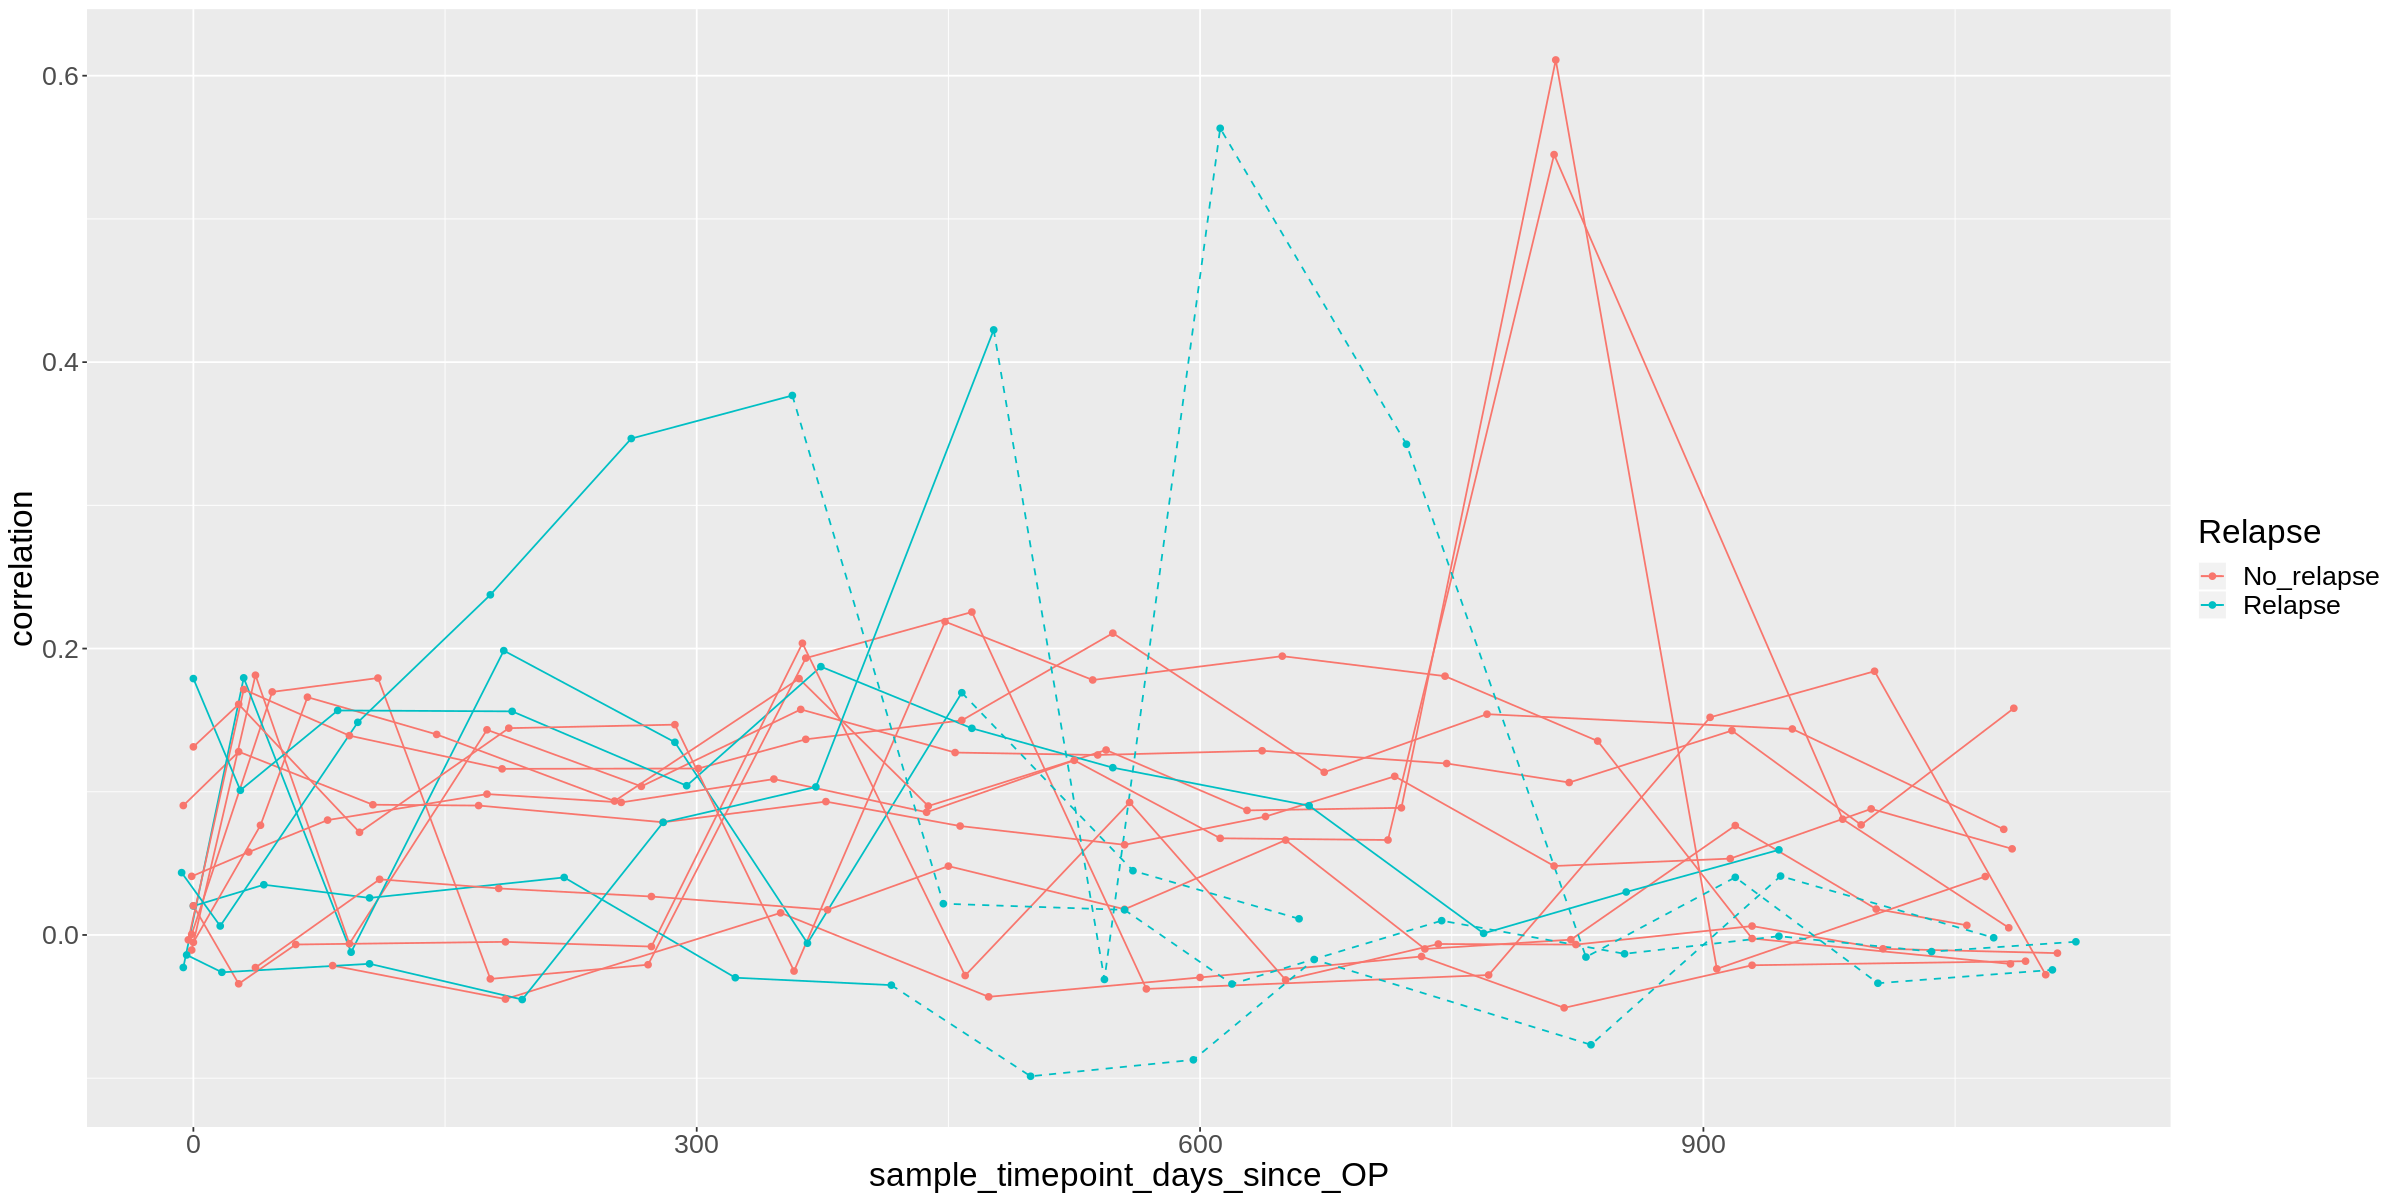

In [26]:
combined_correlation_plot

In [27]:
head(res)

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP,Relapse,time_to_relapse_days,adjuvant_chemo_start_days,adjuvant_chemo_end_days
C04689,C303A04689D_cfdna_N295-103,0.10374856,C303A04689D,267,No_relapse,NA,15.21875,197.8438
C04689,C305A04689D_cfdna_N295-71,0.12736567,C305A04689D,454,No_relapse,NA,15.21875,197.8438
C04689,C309A04689D_cfdna_N295-47,0.10645930,C309A04689D,820,No_relapse,NA,15.21875,197.8438
C04689,C302A04689D_cfdna_N295-102,0.14324630,C302A04689D,175,No_relapse,NA,15.21875,197.8438
C04689,C299A04689D_cfdna_N295-99,-0.01054311,C299A04689D,-1,No_relapse,NA,15.21875,197.8438
C04689,C307A04689D_cfdna_N295-110,0.12862434,C307A04689D,637,No_relapse,NA,15.21875,197.8438


In [28]:
readcounts <- read.csv("data/read_counts.csv")
readcounts <- readcounts %>% select(-pt_id)

In [29]:
readcounts <- left_join(res, readcounts, by="cfDNA_sample")

In [30]:
options(repr.plot.width=12, repr.plot.height=20)

Warning message:
“Removed 2 rows containing missing values (geom_point).”

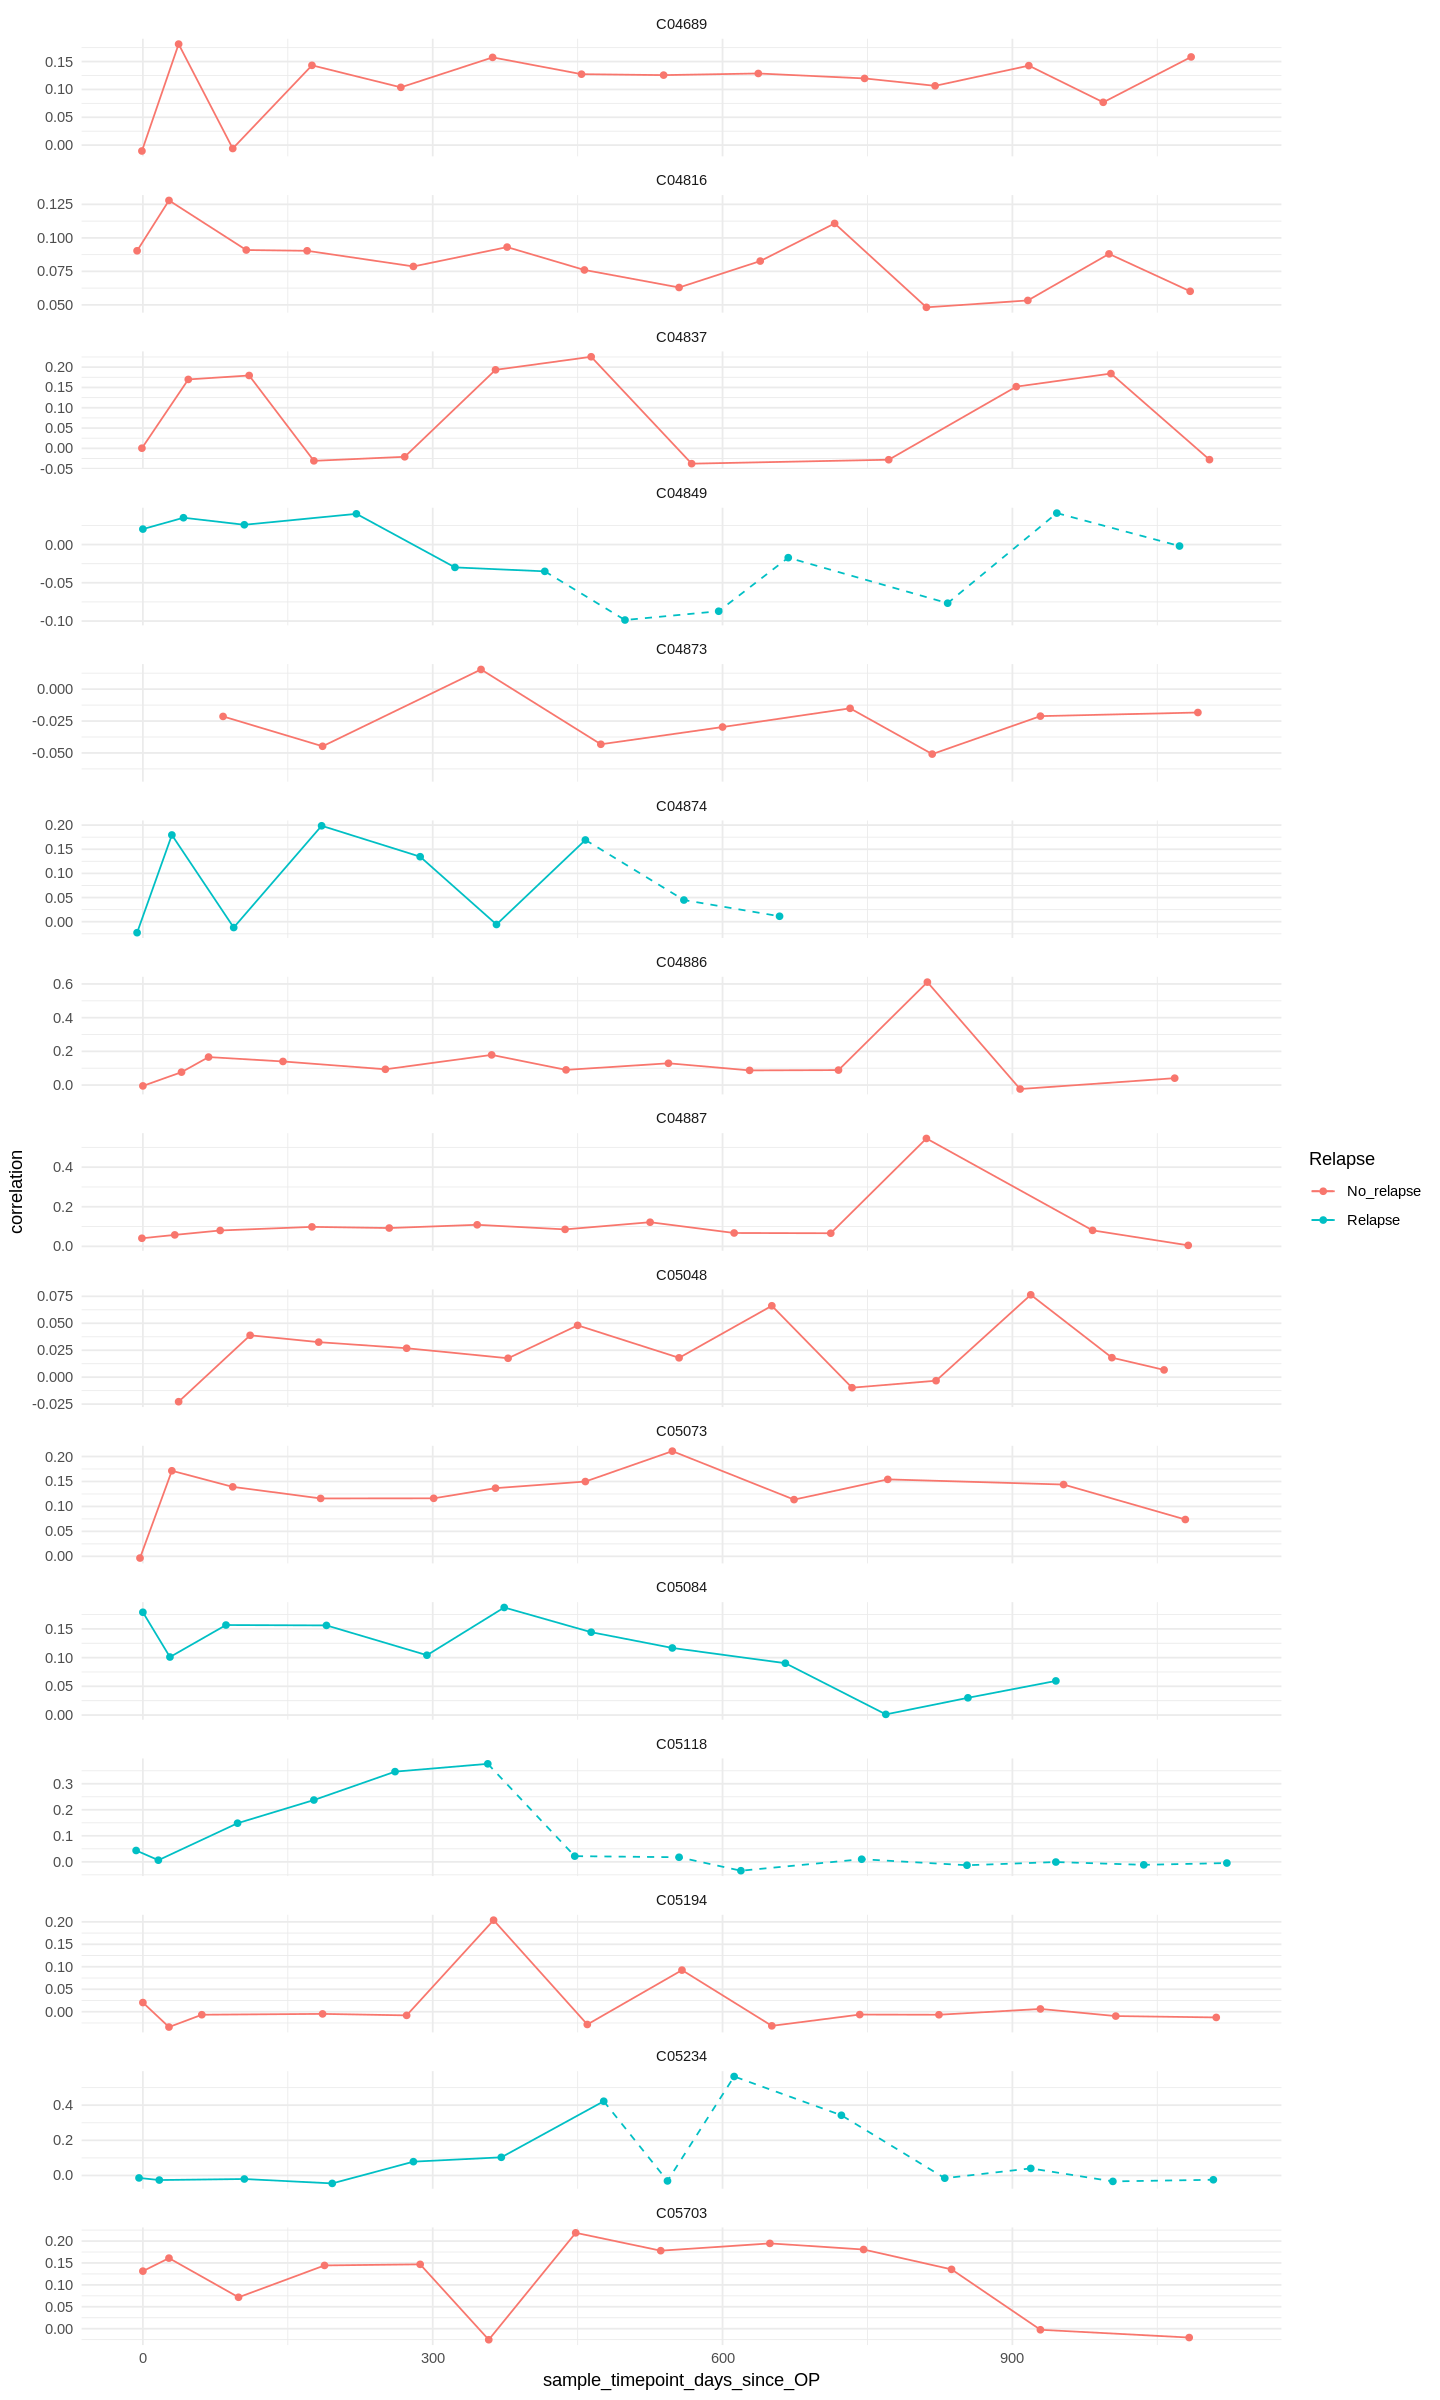

In [31]:
ggplot() + 
    geom_line(data = normalized_res_intervention_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse)) + 
    geom_line(data = normalized_res_intervention_relapses, aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse), linetype = "dashed") + 
    geom_point(data = res, aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse))+ theme(text = element_text(size = 20))+
    theme_minimal() +
    facet_wrap(~pt_id, ncol =1, scales = "free_y")

In [31]:
readcounts

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP,Relapse,time_to_relapse_days,adjuvant_chemo_start_days,adjuvant_chemo_end_days,readcount
C04689,C303A04689D_cfdna_N295-103,0.103748559,C303A04689D,267,No_relapse,NA,15.21875,197.8438,827991065
C04689,C305A04689D_cfdna_N295-71,0.127365667,C305A04689D,454,No_relapse,NA,15.21875,197.8438,883469138
C04689,C309A04689D_cfdna_N295-47,0.106459304,C309A04689D,820,No_relapse,NA,15.21875,197.8438,817835199
C04689,C302A04689D_cfdna_N295-102,0.143246296,C302A04689D,175,No_relapse,NA,15.21875,197.8438,922155779
C04689,C299A04689D_cfdna_N295-99,-0.010543112,C299A04689D,-1,No_relapse,NA,15.21875,197.8438,932048828
C04689,C307A04689D_cfdna_N295-110,0.128624342,C307A04689D,637,No_relapse,NA,15.21875,197.8438,890590110
C04689,C300A04689D_cfdna_N295-100,0.181386821,C300A04689D,37,No_relapse,NA,15.21875,197.8438,1146394933
C04689,C306A04689D_cfdna_N295-90,0.125682292,C306A04689D,539,No_relapse,NA,15.21875,197.8438,938698170
C04689,C312A04689D_cfdna_N295-162,0.158309612,C312A04689D,1085,No_relapse,NA,15.21875,197.8438,1007226108
C04689,C311A04689D_cfdna_N295-157,0.076872051,C311A04689D,994,No_relapse,NA,15.21875,197.8438,940465477


Warning message:
“Removed 2 rows containing missing values (geom_point).”

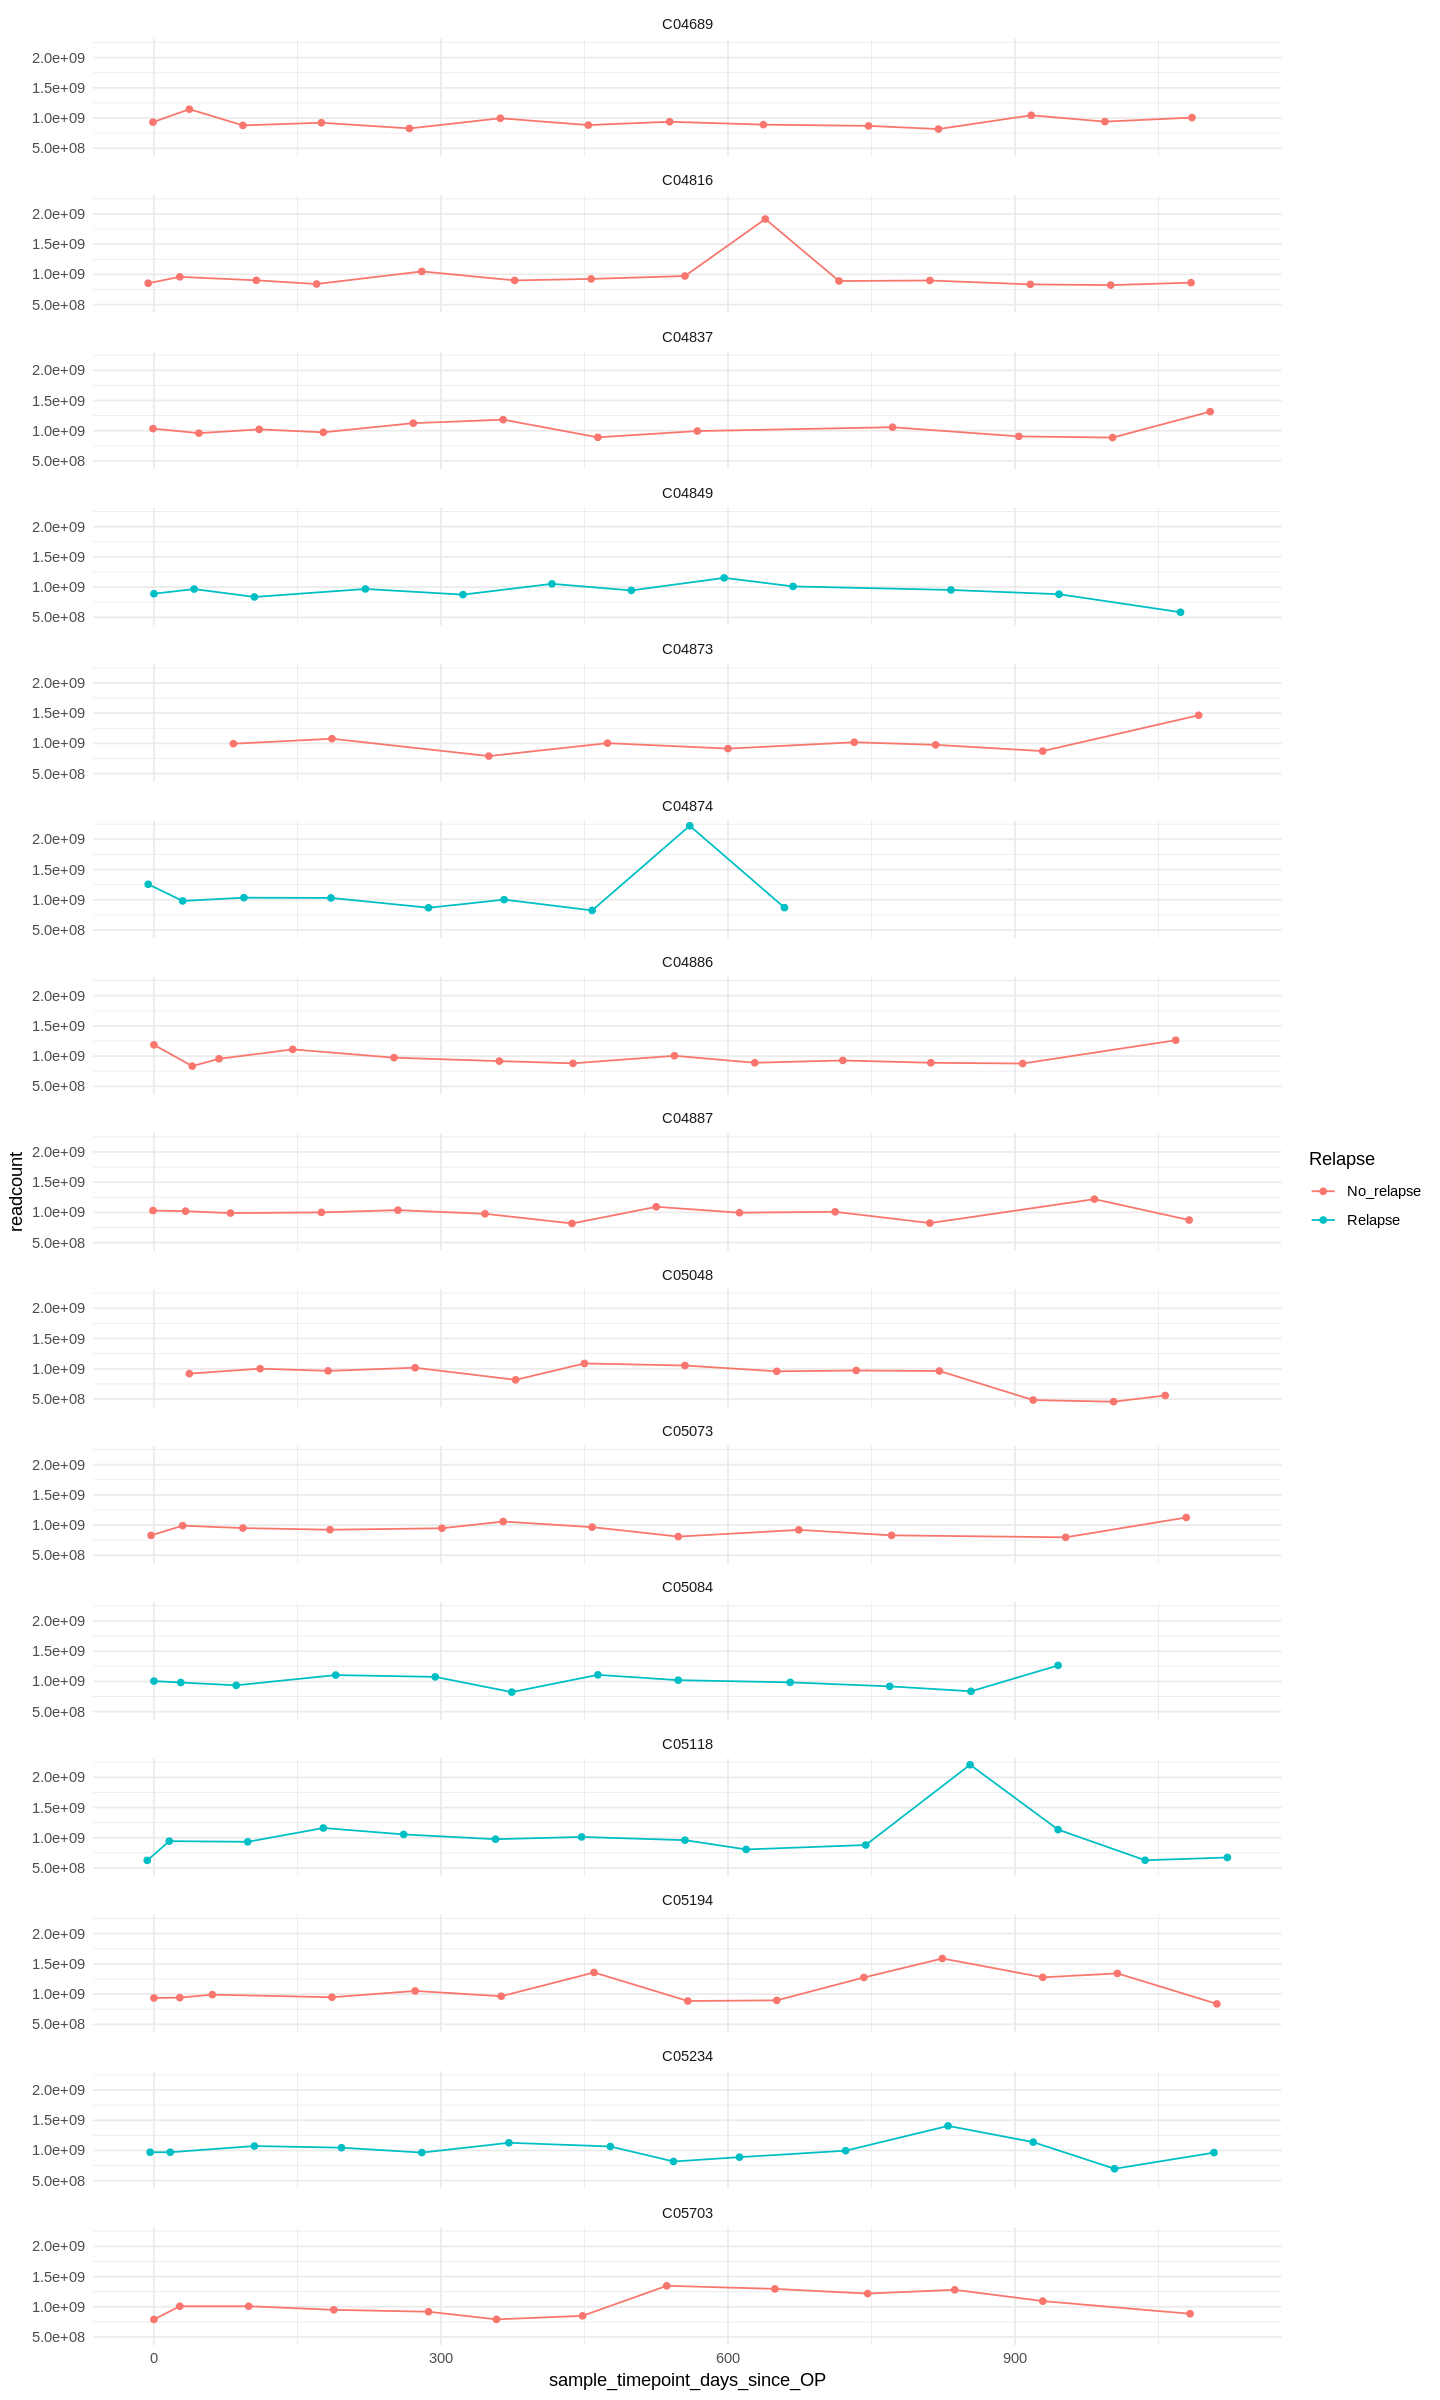

In [32]:
ggplot() + 
    geom_line(data=readcounts, aes(x = sample_timepoint_days_since_OP, y = readcount, color = Relapse))+
    geom_point(data=readcounts, aes(x = sample_timepoint_days_since_OP, y = readcount, color = Relapse))+
    theme_minimal() +
    facet_wrap(~pt_id, ncol =1)